<a href="https://colab.research.google.com/github/Saurav-Somani/NLP_Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP PROJECT**

# **NLP PROJECT ROUND - 1**

**Importing all the necessary libraries**

In [5]:
import pandas as pnds
import matplotlib.pyplot as mplp
import nltk
import operator
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string

from nltk.probability import FreqDist as FD
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

f1 = open("Animal Life in the field and Garden.txt","r",encoding="utf-8")
f2 = open("The Life Of the Caterpillar.txt", "r",encoding="utf-8")


# For taking the main lines of the book 1 : 'Animal Life in the Field and Garden'
with open("Animal Life in the field and Garden.txt", encoding="utf-8") as book:
    lines_1 = book.readlines()

begin_index = lines_1.index("CHAPTER I\n")
end_index = len(lines_1) - 1 - lines_1[::-1].index("NOTES\n")
print("The main content is for text T1 is from line numbers {} to {}".format(begin_index, end_index))

lines_1 = lines_1[begin_index:end_index]

# For taking the main lines of the book 2 : 'The Life Of the Caterpillar'
with open("The Life Of the Caterpillar.txt", encoding="utf-8") as book:
    lines_2 = book.readlines()

begin_index = lines_2.index("CHAPTER I\n")
end_index = len(lines_2) - 1 - lines_2[::-1].index("NOTES\n")
print("The main content is for text T2 is from line numbers {} to {}".format(begin_index, end_index))

lines_2 = lines_2[begin_index:end_index]






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The main content is for text T1 is from line numbers 130 to 9715
The main content is for text T2 is from line numbers 126 to 7279


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Removing all the empty and unnecessary lines**

In [7]:
def empty_line_remover(lines):      #function for removing the running words & empty lines

  chapter_pattern = r"CHAPTER [IVX]+"

  temp = []
  for line in lines:
      is_valid = ((line == '\n') or re.match(chapter_pattern, line))
      if(not is_valid):               # If the line is neither a chapter number nor a part heading nor an empty line
          temp.append(line)           # include it in the final list

  return temp


lines_1 = empty_line_remover(lines_1)
lines_2 = empty_line_remover(lines_2)

T1 = ''.join(lines_1)   #joining the lines to string
T2 = ''.join(lines_2)   #Joining the lines to string


In [8]:
T1_words = T1.split()
print("number of words in T1:",len(T1_words))

number of words in T1: 90722


In [9]:
T2_words = T2.split()
print("number of words in T2:",len(T2_words))

number of words in T2: 70156


**Text Preprocessing**

In [10]:
def text_preprocessor(text):
  
  text= text.lower()
  text = re.sub('https?://\S+|www\.\S+', '', text) # to remove links
  text = re.sub('\s', '_', text)            # Replacing spaces with '_'
  text = re.sub(r'\W+', '', text)           # Removing non-alphanumeric characters
  text = re.sub('_', ' ', text)             # Replacing spaces with '_'
  return text




In [67]:
#T1= text_preprocessor(T1)
T1

'what uncle paul proposes to talk about in these talk that we shall have together said uncle paul a he sat with his nephew one evening in may under the big elder tree in the garden i propose to designate a friend those form of animal life that though not domesticated or cared for by u nevertheless come to our aid by waging war on insect and various other devouring creature which would in the end unless their excessive multiplication were kept in restraint by others besides ourselves eat up all our crop and lay waste our field and it is these ravagers of the farmer carefully tilled acre that i shall speak of a foe what can man effort avail against those voracious horde multiplying a they do every year to an extent beyond calculation will he have the patience the skill the keenness of vision necessary for waging successful warfare on the tiniest specie often the most formidable when the junebug despite it far greater size baffle all his endeavor will he undertake to examine his field and

In [68]:
#T2= text_preprocessor(T2)
T2

'the pine processionary the egg and the hatching this caterpillar ha already had his story told by réaumur 1 but it wa a story marked by gap these were inevitable in the condition under which the great man worked for he had to receive all his material by barge from the distant bordeaux landes the transplanted insect could not be expected to furnish it biographer with other than fragmentary evidence very weak in those biological detail which form the principal charm of entomology to study the habit of insect one must observe them long and closely on their native heath so to speak in the place where their instinct have full and natural play with caterpillar foreign to the paris climate and brought from the other end of france réaumur therefore ran the risk of missing many most interesting fact this is what actually happened just a it did on a later occasion in the case of another alien the cicada 2 nevertheless the information which he wa able to extract from a few nest sent to him from 

**Tokenization**

In [13]:
token1=word_tokenize(T1)
token1

['what',
 'uncle',
 'paul',
 'proposes',
 'to',
 'talk',
 'about',
 'in',
 'these',
 'talks',
 'that',
 'we',
 'shall',
 'have',
 'together',
 'said',
 'uncle',
 'paul',
 'as',
 'he',
 'sat',
 'with',
 'his',
 'nephews',
 'one',
 'evening',
 'in',
 'may',
 'under',
 'the',
 'big',
 'elder',
 'tree',
 'in',
 'the',
 'garden',
 'i',
 'propose',
 'to',
 'designate',
 'as',
 'friends',
 'those',
 'forms',
 'of',
 'animal',
 'life',
 'that',
 'though',
 'not',
 'domesticated',
 'or',
 'cared',
 'for',
 'by',
 'us',
 'nevertheless',
 'come',
 'to',
 'our',
 'aid',
 'by',
 'waging',
 'war',
 'on',
 'insects',
 'and',
 'various',
 'other',
 'devouring',
 'creatures',
 'which',
 'would',
 'in',
 'the',
 'end',
 'unless',
 'their',
 'excessive',
 'multiplication',
 'were',
 'kept',
 'in',
 'restraint',
 'by',
 'others',
 'besides',
 'ourselves',
 'eat',
 'up',
 'all',
 'our',
 'crops',
 'and',
 'lay',
 'waste',
 'our',
 'fields',
 'and',
 'it',
 'is',
 'these',
 'ravagers',
 'of',
 'the',
 'farm

In [14]:
token2=word_tokenize(T2)
token2

['the',
 'pine',
 'processionary',
 'the',
 'eggs',
 'and',
 'the',
 'hatching',
 'this',
 'caterpillar',
 'has',
 'already',
 'had',
 'his',
 'story',
 'told',
 'by',
 'réaumur',
 '1',
 'but',
 'it',
 'was',
 'a',
 'story',
 'marked',
 'by',
 'gaps',
 'these',
 'were',
 'inevitable',
 'in',
 'the',
 'conditions',
 'under',
 'which',
 'the',
 'great',
 'man',
 'worked',
 'for',
 'he',
 'had',
 'to',
 'receive',
 'all',
 'his',
 'materials',
 'by',
 'barge',
 'from',
 'the',
 'distant',
 'bordeaux',
 'landes',
 'the',
 'transplanted',
 'insect',
 'could',
 'not',
 'be',
 'expected',
 'to',
 'furnish',
 'its',
 'biographer',
 'with',
 'other',
 'than',
 'fragmentary',
 'evidence',
 'very',
 'weak',
 'in',
 'those',
 'biological',
 'details',
 'which',
 'form',
 'the',
 'principal',
 'charm',
 'of',
 'entomology',
 'to',
 'study',
 'the',
 'habits',
 'of',
 'insects',
 'one',
 'must',
 'observe',
 'them',
 'long',
 'and',
 'closely',
 'on',
 'their',
 'native',
 'heath',
 'so',
 'to',
 's

**Frequency Analysis**

In [15]:
fd1 = FD(token1)
fd1

FreqDist({'what': 226,
          'uncle': 108,
          'paul': 67,
          'proposes': 2,
          'to': 2182,
          'talk': 11,
          'about': 167,
          'in': 1880,
          'these': 236,
          'talks': 6,
          'that': 1151,
          'we': 243,
          'shall': 35,
          'have': 396,
          'together': 58,
          'said': 119,
          'as': 777,
          'he': 163,
          'sat': 1,
          'with': 930,
          'his': 168,
          'nephews': 2,
          'one': 376,
          'evening': 27,
          'may': 124,
          'under': 91,
          'the': 7113,
          'big': 40,
          'elder': 2,
          'tree': 83,
          'garden': 38,
          'i': 463,
          'propose': 4,
          'designate': 3,
          'friends': 7,
          'those': 142,
          'forms': 17,
          'of': 3145,
          'animal': 107,
          'life': 37,
          'though': 21,
          'not': 506,
          'domesticated': 1,
          

In [16]:
fd2 = FD(token2)
fd2

FreqDist({'the': 6470,
          'pine': 55,
          'processionary': 56,
          'eggs': 63,
          'and': 1467,
          'hatching': 15,
          'this': 424,
          'caterpillar': 150,
          'has': 214,
          'already': 33,
          'had': 76,
          'his': 349,
          'story': 5,
          'told': 8,
          'by': 504,
          'réaumur': 12,
          '1': 3,
          'but': 227,
          'it': 782,
          'was': 114,
          'a': 1922,
          'marked': 10,
          'gaps': 1,
          'these': 157,
          'were': 77,
          'inevitable': 4,
          'in': 1363,
          'conditions': 19,
          'under': 97,
          'which': 615,
          'great': 95,
          'man': 12,
          'worked': 4,
          'for': 484,
          'he': 260,
          'to': 1719,
          'receive': 8,
          'all': 297,
          'materials': 22,
          'barge': 1,
          'from': 323,
          'distant': 7,
          'bordeaux': 1,
   

In [17]:
K = 25
list_fd1 = dict(sorted(fd1.items(), key=operator.itemgetter(1),reverse=True))
list_fd2 = dict(sorted(fd2.items(), key=operator.itemgetter(1),reverse=True))

list_output_fd1 = dict(list(list_fd1.items())[0: K]) 
list_output_fd2 = dict(list(list_fd2.items())[0: K])

 

In [18]:
print("K highest frequency words for text T1 are : " + str(list_output_fd1))

K highest frequency words for text T1 are : {'the': 7113, 'of': 3145, 'and': 2897, 'to': 2182, 'a': 2161, 'in': 1880, 'it': 1806, 'is': 1654, 'that': 1151, 'its': 1110, 'with': 930, 'as': 777, 'are': 735, 'for': 696, 'on': 668, 'they': 653, 'by': 576, 'their': 527, 'not': 506, 'or': 469, 'but': 467, 'i': 463, 'be': 455, 'you': 454, 'this': 427}


In [19]:
print("K highest frequency words for text T2 are : " + str(list_output_fd2))

K highest frequency words for text T2 are : {'the': 6470, 'of': 2969, 'a': 1922, 'to': 1719, 'and': 1467, 'in': 1363, 'is': 1274, 'it': 782, 'i': 683, 'with': 639, 'which': 615, 'that': 611, 'as': 521, 'by': 504, 'on': 494, 'for': 484, 'at': 484, 'not': 475, 'are': 445, 'this': 424, 'they': 418, 'their': 408, 'my': 357, 'his': 349, 'be': 338}


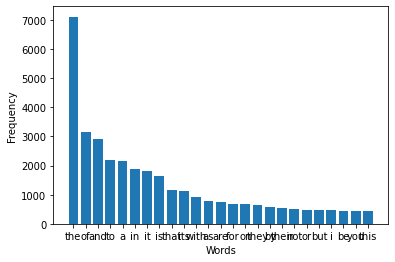

In [20]:
mplp.bar(list_output_fd1.keys(),list_output_fd1.values())
mplp.xlabel('Words')
mplp.ylabel('Frequency')
mplp.show()

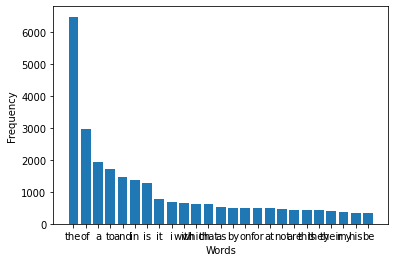

In [21]:
mplp.bar(list_output_fd2.keys(),list_output_fd2.values())
mplp.xlabel('Words')
mplp.ylabel('Frequency')
mplp.show()

**Word Cloud**

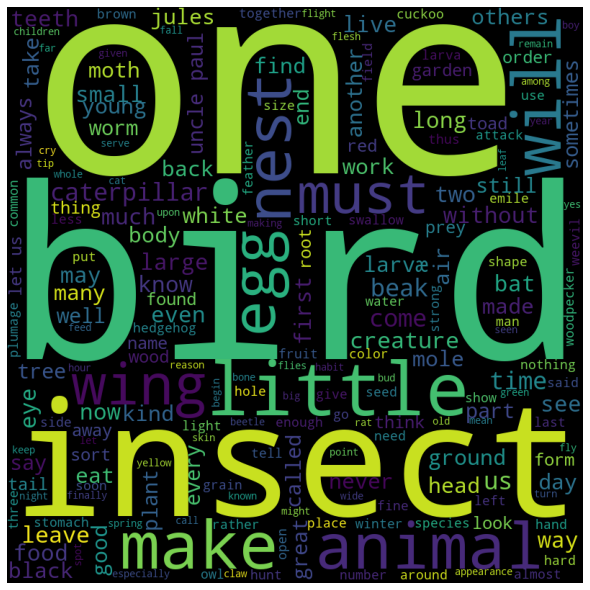

In [22]:


word_cloud_instance = WordCloud(width = 800, height = 800, background_color ='black',  
                      min_font_size = 8).generate(T1) 
                     
mplp.figure(figsize = (8, 8), facecolor = None) 
mplp.imshow(word_cloud_instance) 
mplp.axis("off") 
mplp.tight_layout(pad = 0) 
mplp.show() 


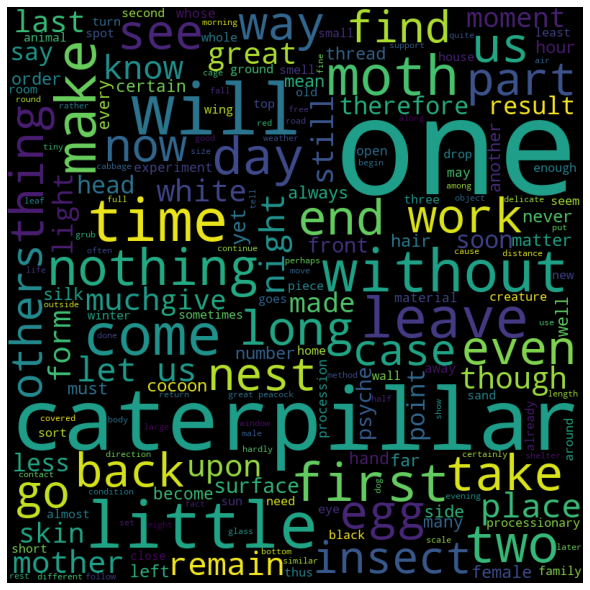

In [23]:
word_cloud_instance = WordCloud(width = 800, height = 800, background_color ='black',  
                      min_font_size = 8).generate(T2) 
                     
mplp.figure(figsize = (8, 8), facecolor = None) 
mplp.imshow(word_cloud_instance) 
mplp.axis("off") 
mplp.tight_layout(pad = 0) 
mplp.show() 

**Removing stopwords**

In [24]:
nltk.download('stopwords')

from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Word cloud after removing stopwords**

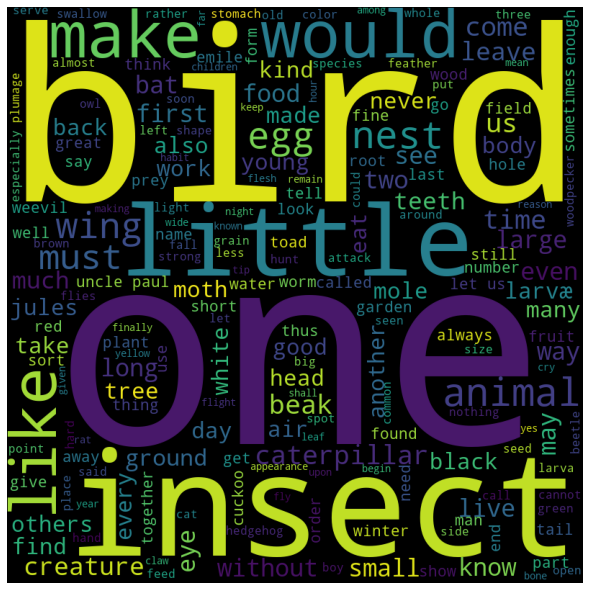

In [25]:
word_cloud_instance = WordCloud(width = 800, height = 800, background_color ='black',  
                      stopwords = all_stopwords,min_font_size = 8).generate(T1) 
                     
mplp.figure(figsize = (8, 8), facecolor = None) 
mplp.imshow(word_cloud_instance) 
mplp.axis("off") 
mplp.tight_layout(pad = 0) 
mplp.show() 

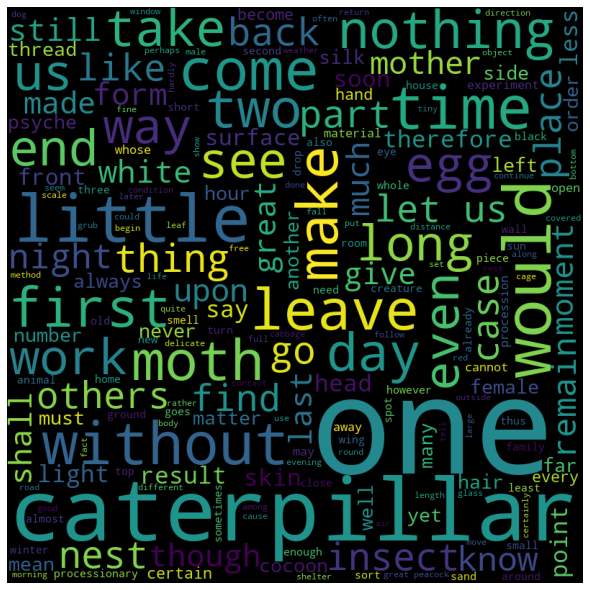

In [26]:
word_cloud_instance = WordCloud(width = 800, height = 800, background_color ='black',  
                      stopwords = all_stopwords,min_font_size = 8).generate(T2) 
                     
mplp.figure(figsize = (8, 8), facecolor = None) 
mplp.imshow(word_cloud_instance) 
mplp.axis("off") 
mplp.tight_layout(pad = 0) 
mplp.show() 

In [27]:


words = {}

def word_counter(text):
   

    for word in text.split():
          
        if(len(word) not in words):
        	words[len(word)]=1
        else:
        	words[len(word)]+=1

**Word length and frequency analysing**

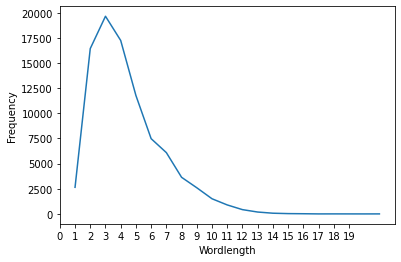

In [28]:
word_counter(T1)

list_count_t1 = sorted(words.items())
x1,y1=zip(*list_count_t1)
mplp.plot(x1,y1)
mplp.xticks(range(0,20))
mplp.rcParams["figure.figsize"] = (10,5)
mplp.xlabel("Wordlength")
mplp.ylabel("Frequency")
mplp.show()

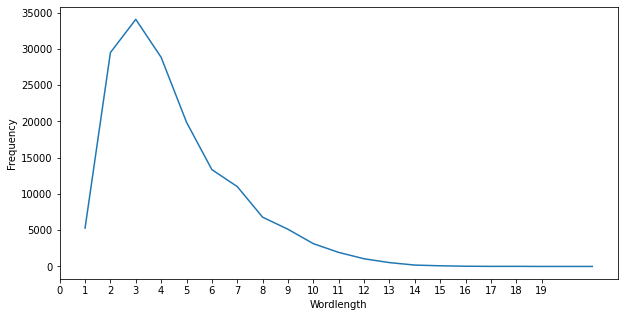

In [29]:
word_counter(T2)

list_count_t2 = sorted(words.items())
x2,y2=zip(*list_count_t2)
mplp.plot(x2,y2)
mplp.xticks(range(0,20))
mplp.rcParams["figure.figsize"] = (10,5)
mplp.xlabel("Wordlength")
mplp.ylabel("Frequency")
mplp.show()

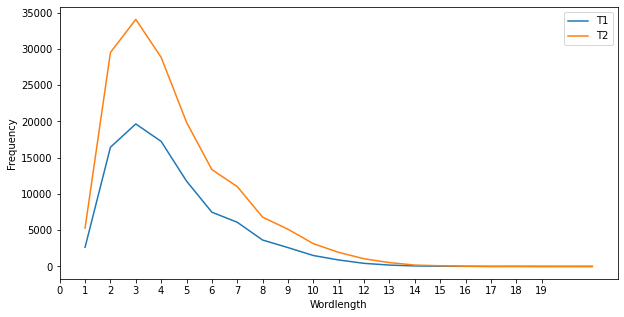

In [30]:
mplp.plot(x1, y1, label = "T1")
mplp.plot(x2, y2, label = "T2")
mplp.xlabel('Wordlength')
mplp.ylabel('Frequency')
mplp.legend()
mplp.rcParams["figure.figsize"] = (10,5)
mplp.xticks(range(0,20))
mplp.show()

**PoS Tagging**

In [31]:
nltk.download('averaged_perceptron_tagger')

tagged1 = nltk.pos_tag(token1) 
tagged1 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('what', 'WP'),
 ('uncle', 'NN'),
 ('paul', 'NN'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('talk', 'VB'),
 ('about', 'IN'),
 ('in', 'IN'),
 ('these', 'DT'),
 ('talks', 'NNS'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('shall', 'MD'),
 ('have', 'VB'),
 ('together', 'RB'),
 ('said', 'VBD'),
 ('uncle', 'NN'),
 ('paul', 'NN'),
 ('as', 'IN'),
 ('he', 'PRP'),
 ('sat', 'VBD'),
 ('with', 'IN'),
 ('his', 'PRP$'),
 ('nephews', 'NNS'),
 ('one', 'CD'),
 ('evening', 'NN'),
 ('in', 'IN'),
 ('may', 'MD'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('big', 'JJ'),
 ('elder', 'NN'),
 ('tree', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('garden', 'NN'),
 ('i', 'NN'),
 ('propose', 'VBP'),
 ('to', 'TO'),
 ('designate', 'VB'),
 ('as', 'IN'),
 ('friends', 'NNS'),
 ('those', 'DT'),
 ('forms', 'NNS'),
 ('of', 'IN'),
 ('animal', 'JJ'),
 ('life', 'NN'),
 ('that', 'WDT'),
 ('though', 'IN'),
 ('not', 'RB'),
 ('domesticated', 'VBN'),
 ('or', 'CC'),
 ('cared', 'VBN'),
 ('for', 'IN'),
 ('by', 'IN'),
 ('us', 'PRP'),
 ('nevertheless', 'R

In [32]:
tagged2 = nltk.pos_tag(token2) 
tagged2

[('the', 'DT'),
 ('pine', 'NN'),
 ('processionary', 'IN'),
 ('the', 'DT'),
 ('eggs', 'NNS'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('hatching', 'NN'),
 ('this', 'DT'),
 ('caterpillar', 'NN'),
 ('has', 'VBZ'),
 ('already', 'RB'),
 ('had', 'VBN'),
 ('his', 'PRP$'),
 ('story', 'NN'),
 ('told', 'VBN'),
 ('by', 'IN'),
 ('réaumur', 'NN'),
 ('1', 'CD'),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('story', 'NN'),
 ('marked', 'VBN'),
 ('by', 'IN'),
 ('gaps', 'NNS'),
 ('these', 'DT'),
 ('were', 'VBD'),
 ('inevitable', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('conditions', 'NNS'),
 ('under', 'IN'),
 ('which', 'WDT'),
 ('the', 'DT'),
 ('great', 'JJ'),
 ('man', 'NN'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('to', 'TO'),
 ('receive', 'VB'),
 ('all', 'DT'),
 ('his', 'PRP$'),
 ('materials', 'NNS'),
 ('by', 'IN'),
 ('barge', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('distant', 'JJ'),
 ('bordeaux', 'NN'),
 ('landes', 'VBZ'),
 ('the', 'DT'),
 ('transplanted',

In [33]:
dict1 = {}
for a,b in tagged1:
	if(b not in dict1):
		dict1[b]=1
	else:
		dict1[b]+=1

dict2 = {}
for a,b in tagged2:
	if(b not in dict2):
		dict2[b]=1
	else:
		dict2[b]+=1

sorted_d1 = dict(sorted(dict1.items(), key=operator.itemgetter(1),reverse=True))
sorted_d2 = dict(sorted(dict2.items(), key=operator.itemgetter(1),reverse=True))

N = 20 
out1 = dict(list(sorted_d1.items())[0: N]) 
out2 = dict(list(sorted_d2.items())[0: N])

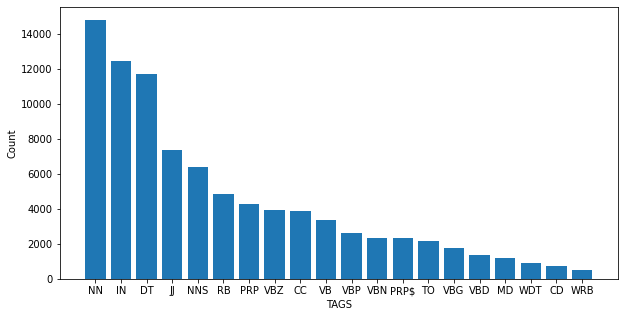

In [34]:
mplp.bar(out1.keys(), out1.values())
mplp.xlabel('TAGS')
mplp.ylabel('Count')
mplp.show()


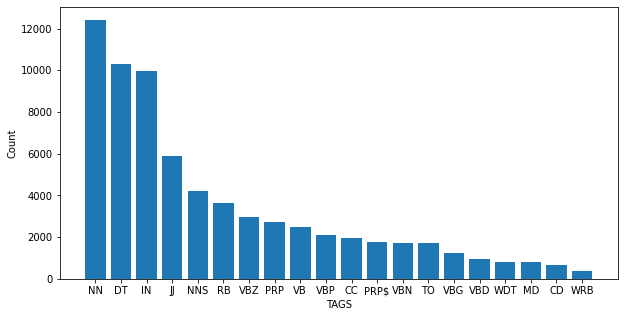

In [35]:
mplp.bar(out2.keys(), out2.values())
mplp.xlabel('TAGS')
mplp.ylabel('Count')
mplp.show()

# **NLP PROJECT ROUND-2**

**Separating Nouns and verbs for text T1**

In [36]:
T1_nouns = []
T1_verbs = []

for i in tagged1:
  if(i[1] == "NN" or i[1] == "NNS" or i[1] == "NNP" or i[1] =="NNPS"):
    T1_nouns.append(i)
  elif (i[1]=="VB" or i[1]=="VBD" or i[1]=="VBG" or i[1]=="VBN" or i[1]=="VBP" or i[1]=="VBZ"):
    T1_verbs.append(i)

print(T1_nouns)
print(T1_verbs)

[('uncle', 'NN'), ('paul', 'NN'), ('talks', 'NNS'), ('uncle', 'NN'), ('paul', 'NN'), ('nephews', 'NNS'), ('evening', 'NN'), ('elder', 'NN'), ('tree', 'NN'), ('garden', 'NN'), ('i', 'NN'), ('friends', 'NNS'), ('forms', 'NNS'), ('life', 'NN'), ('aid', 'NN'), ('war', 'NN'), ('insects', 'NNS'), ('devouring', 'NN'), ('creatures', 'NNS'), ('end', 'NN'), ('multiplication', 'NN'), ('restraint', 'NN'), ('others', 'NNS'), ('crops', 'NNS'), ('fields', 'NNS'), ('ravagers', 'NNS'), ('farmers', 'NNS'), ('acres', 'NNS'), ('foes', 'NNS'), ('efforts', 'NNS'), ('avail', 'NN'), ('hordes', 'NNS'), ('year', 'NN'), ('extent', 'NN'), ('calculation', 'NN'), ('patience', 'NN'), ('skill', 'NN'), ('keenness', 'NN'), ('vision', 'NN'), ('warfare', 'NN'), ('tiniest', 'NN'), ('species', 'NNS'), ('junebug', 'NN'), ('size', 'NN'), ('baffles', 'NNS'), ('endeavors', 'NNS'), ('fields', 'NNS'), ('lump', 'NN'), ('soil', 'NN'), ('spear', 'NN'), ('wheat', 'NN'), ('leaf', 'NN'), ('fruittrees', 'NNS'), ('task', 'NN'), ('race',

**Separating Nouns and Verbs for text T2**

In [37]:
T2_nouns = []
T2_verbs = []

for i in tagged2:
  if(i[1] == "NN" or i[1] == "NNS" or i[1] == "NNP" or i[1] =="NNPS"):
    T2_nouns.append(i)
  elif (i[1]=="VB" or i[1]=="VBD" or i[1]=="VBG" or i[1]=="VBN" or i[1]=="VBP" or i[1]=="VBZ"):
    T2_verbs.append(i)

print(T2_nouns)
print(T2_verbs)

[('pine', 'NN'), ('eggs', 'NNS'), ('hatching', 'NN'), ('caterpillar', 'NN'), ('story', 'NN'), ('réaumur', 'NN'), ('story', 'NN'), ('gaps', 'NNS'), ('conditions', 'NNS'), ('man', 'NN'), ('materials', 'NNS'), ('barge', 'NN'), ('bordeaux', 'NN'), ('insect', 'NN'), ('biographer', 'NN'), ('evidence', 'NN'), ('details', 'NNS'), ('charm', 'NN'), ('entomology', 'NN'), ('habits', 'NNS'), ('insects', 'NNS'), ('heath', 'NN'), ('place', 'NN'), ('instincts', 'NNS'), ('play', 'NN'), ('caterpillars', 'NNS'), ('paris', 'NN'), ('climate', 'NN'), ('brought', 'NN'), ('end', 'NN'), ('france', 'NN'), ('réaumur', 'NN'), ('risk', 'NN'), ('facts', 'NNS'), ('occasion', 'NN'), ('case', 'NN'), ('alien', 'NN'), ('cicada', 'NN'), ('information', 'NN'), ('nests', 'NNS'), ('landes', 'NNS'), ('value', 'NN'), ('circumstances', 'NNS'), ('i', 'NN'), ('story', 'NN'), ('caterpillar', 'NN'), ('pine', 'NN'), ('subject', 'NN'), ('hopes', 'NNS'), ('lack', 'NN'), ('materials', 'NNS'), ('harmas', 'NN'), ('laboratory', 'NN'), ('

**Categorizing and frequencing the nouns and verbs**

In [38]:
from nltk.corpus import wordnet
nltk.download('wordnet')
T1_nouns_dict = {}

for i in T1_nouns:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='n':
      if j.lexname() in T1_nouns_dict:
        T1_nouns_dict[j.lexname()]+=1
      else:
        T1_nouns_dict[j.lexname()]=1

T1_nouns_dict

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{'noun.Tops': 1169,
 'noun.act': 8384,
 'noun.animal': 5516,
 'noun.artifact': 13422,
 'noun.attribute': 5854,
 'noun.body': 3710,
 'noun.cognition': 6312,
 'noun.communication': 8663,
 'noun.event': 2292,
 'noun.feeling': 778,
 'noun.food': 2596,
 'noun.group': 5238,
 'noun.location': 4391,
 'noun.motive': 260,
 'noun.object': 2781,
 'noun.person': 8235,
 'noun.phenomenon': 1005,
 'noun.plant': 2052,
 'noun.possession': 1183,
 'noun.process': 460,
 'noun.quantity': 2398,
 'noun.relation': 599,
 'noun.shape': 910,
 'noun.state': 3998,
 'noun.substance': 1848,
 'noun.time': 4008}

In [39]:
T1_verbs_dict = {}
for i in T1_verbs:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='v':
      if j.lexname() in T1_verbs_dict:
        T1_verbs_dict[j.lexname()]+=1
      else:
        T1_verbs_dict[j.lexname()]=1

T1_verbs_dict

{'verb.body': 7072,
 'verb.change': 14977,
 'verb.cognition': 11635,
 'verb.communication': 14658,
 'verb.competition': 3123,
 'verb.consumption': 3775,
 'verb.contact': 11172,
 'verb.creation': 10004,
 'verb.emotion': 1778,
 'verb.motion': 12122,
 'verb.perception': 6488,
 'verb.possession': 17869,
 'verb.social': 15161,
 'verb.stative': 53175,
 'verb.weather': 231}

In [40]:
T2_nouns_dict = {}

for i in T2_nouns:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='n':
      if j.lexname() in T2_nouns_dict:
        T2_nouns_dict[j.lexname()]+=1
      else:
        T2_nouns_dict[j.lexname()]=1

T2_nouns_dict

{'noun.Tops': 700,
 'noun.act': 7542,
 'noun.animal': 1918,
 'noun.artifact': 12043,
 'noun.attribute': 4847,
 'noun.body': 1792,
 'noun.cognition': 6110,
 'noun.communication': 7334,
 'noun.event': 2207,
 'noun.feeling': 596,
 'noun.food': 1125,
 'noun.group': 3697,
 'noun.location': 3784,
 'noun.motive': 169,
 'noun.object': 2072,
 'noun.person': 4276,
 'noun.phenomenon': 1080,
 'noun.plant': 1045,
 'noun.possession': 1107,
 'noun.process': 460,
 'noun.quantity': 2262,
 'noun.relation': 664,
 'noun.shape': 821,
 'noun.state': 3937,
 'noun.substance': 1736,
 'noun.time': 4787}

In [41]:
T2_verbs_dict = {}
for i in T2_verbs:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='v':
      if j.lexname() in T2_verbs_dict:
        T2_verbs_dict[j.lexname()]+=1
      else:
        T2_verbs_dict[j.lexname()]=1

T2_verbs_dict

{'verb.body': 5064,
 'verb.change': 11910,
 'verb.cognition': 7544,
 'verb.communication': 8559,
 'verb.competition': 2155,
 'verb.consumption': 2341,
 'verb.contact': 7726,
 'verb.creation': 7006,
 'verb.emotion': 1005,
 'verb.motion': 8915,
 'verb.perception': 4523,
 'verb.possession': 13111,
 'verb.social': 11820,
 'verb.stative': 40036,
 'verb.weather': 117}

**Histograms for Nouns and verbs for text T1**

([<matplotlib.axis.XTick at 0x7f6c5f8e0d50>,
 [Text(0, 0, 'noun.person'),
  Text(0, 0, 'noun.communication'),
  Text(0, 0, 'noun.act'),
  Text(0, 0, 'noun.time'),
  Text(0, 0, 'noun.plant'),
  Text(0, 0, 'noun.shape'),
  Text(0, 0, 'noun.artifact'),
  Text(0, 0, 'noun.group'),
  Text(0, 0, 'noun.substance'),
  Text(0, 0, 'noun.quantity'),
  Text(0, 0, 'noun.cognition'),
  Text(0, 0, 'noun.attribute'),
  Text(0, 0, 'noun.body'),
  Text(0, 0, 'noun.Tops'),
  Text(0, 0, 'noun.state'),
  Text(0, 0, 'noun.phenomenon'),
  Text(0, 0, 'noun.motive'),
  Text(0, 0, 'noun.possession'),
  Text(0, 0, 'noun.animal'),
  Text(0, 0, 'noun.location'),
  Text(0, 0, 'noun.event'),
  Text(0, 0, 'noun.process'),
  Text(0, 0, 'noun.object'),
  Text(0, 0, 'noun.feeling'),
  Text(0, 0, 'noun.food'),
  Text(0, 0, 'noun.relation')])

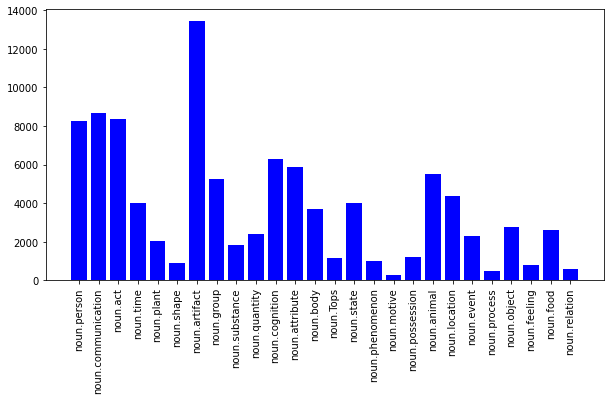

In [42]:
mplp.bar(T1_nouns_dict.keys(), T1_nouns_dict.values(),color='b')
y_pos = range(len(T1_nouns_dict.keys()))
mplp.xticks(y_pos, T1_nouns_dict.keys(), rotation=90)

([<matplotlib.axis.XTick at 0x7f6c5f85bf50>,
 [Text(0, 0, 'verb.communication'),
  Text(0, 0, 'verb.cognition'),
  Text(0, 0, 'verb.social'),
  Text(0, 0, 'verb.possession'),
  Text(0, 0, 'verb.stative'),
  Text(0, 0, 'verb.perception'),
  Text(0, 0, 'verb.change'),
  Text(0, 0, 'verb.consumption'),
  Text(0, 0, 'verb.creation'),
  Text(0, 0, 'verb.body'),
  Text(0, 0, 'verb.contact'),
  Text(0, 0, 'verb.motion'),
  Text(0, 0, 'verb.competition'),
  Text(0, 0, 'verb.emotion'),
  Text(0, 0, 'verb.weather')])

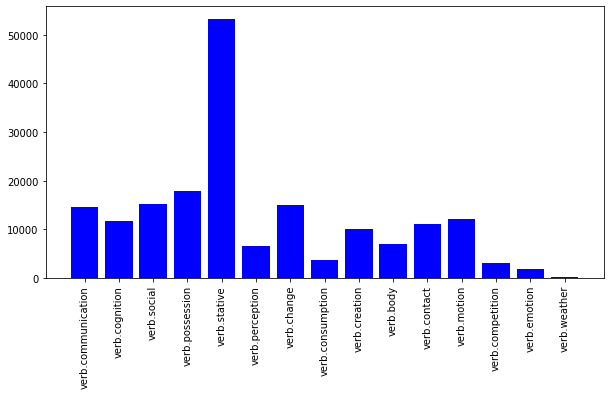

In [43]:
mplp.bar(T1_verbs_dict.keys(), T1_verbs_dict.values(),color='b')
y_pos = range(len(T1_verbs_dict.keys()))
mplp.xticks(y_pos, T1_verbs_dict.keys(), rotation=90)

**Histograms for nouns and verbs for novel T2**

([<matplotlib.axis.XTick at 0x7f6c5f78ec10>,
 [Text(0, 0, 'noun.plant'),
  Text(0, 0, 'noun.food'),
  Text(0, 0, 'noun.animal'),
  Text(0, 0, 'noun.body'),
  Text(0, 0, 'noun.process'),
  Text(0, 0, 'noun.attribute'),
  Text(0, 0, 'noun.artifact'),
  Text(0, 0, 'noun.communication'),
  Text(0, 0, 'noun.object'),
  Text(0, 0, 'noun.act'),
  Text(0, 0, 'noun.state'),
  Text(0, 0, 'noun.phenomenon'),
  Text(0, 0, 'noun.cognition'),
  Text(0, 0, 'noun.person'),
  Text(0, 0, 'noun.location'),
  Text(0, 0, 'noun.substance'),
  Text(0, 0, 'noun.relation'),
  Text(0, 0, 'noun.group'),
  Text(0, 0, 'noun.time'),
  Text(0, 0, 'noun.event'),
  Text(0, 0, 'noun.motive'),
  Text(0, 0, 'noun.quantity'),
  Text(0, 0, 'noun.possession'),
  Text(0, 0, 'noun.feeling'),
  Text(0, 0, 'noun.shape'),
  Text(0, 0, 'noun.Tops')])

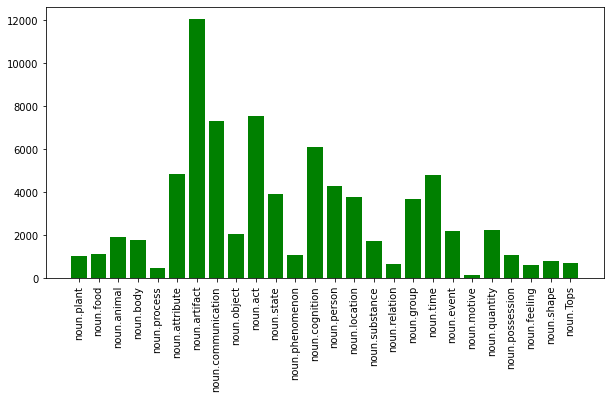

In [44]:
mplp.bar(T2_nouns_dict.keys(), T2_nouns_dict.values(),color='g')
y_pos = range(len(T2_nouns_dict.keys()))
mplp.xticks(y_pos, T2_nouns_dict.keys(), rotation=90)

([<matplotlib.axis.XTick at 0x7f6c5f680590>,
 [Text(0, 0, 'verb.possession'),
  Text(0, 0, 'verb.stative'),
  Text(0, 0, 'verb.perception'),
  Text(0, 0, 'verb.change'),
  Text(0, 0, 'verb.consumption'),
  Text(0, 0, 'verb.social'),
  Text(0, 0, 'verb.creation'),
  Text(0, 0, 'verb.body'),
  Text(0, 0, 'verb.communication'),
  Text(0, 0, 'verb.contact'),
  Text(0, 0, 'verb.cognition'),
  Text(0, 0, 'verb.motion'),
  Text(0, 0, 'verb.emotion'),
  Text(0, 0, 'verb.competition'),
  Text(0, 0, 'verb.weather')])

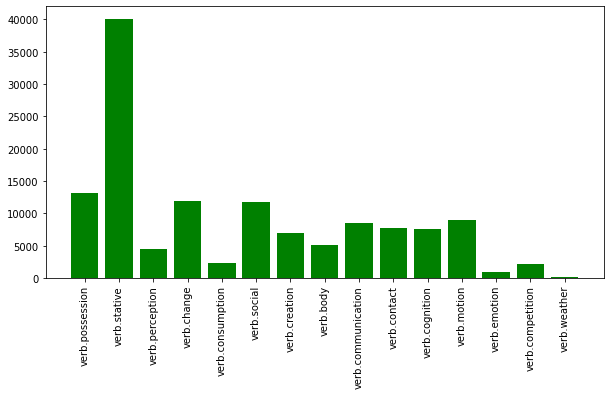

In [45]:
mplp.bar(T2_verbs_dict.keys(), T2_verbs_dict.values(),color='g')
y_pos = range(len(T2_verbs_dict.keys()))
mplp.xticks(y_pos, T2_verbs_dict.keys(), rotation=90)

**PART-2**

**Named Entity Recognition NER**

In [69]:
import spacy
from spacy import displacy
import en_core_web_sm
from collections import Counter
NER = en_core_web_sm.load()

doc1 = NER(T1)
print([(X.text, X.label_) for X in doc1.ents])

[('uncle paul', 'PERSON'), ('acre', 'PERSON'), ('u helper', 'ORG'), ('martin', 'ORG'), ('daily', 'DATE'), ('u', 'ORG'), ('foolishly', 'ORG'), ('first', 'ORDINAL'), ('first', 'ORDINAL'), ('doe', 'PERSON'), ('emile', 'PERSON'), ('doe', 'ORG'), ('artisan', 'ORG'), ('wolf', 'PERSON'), ('two', 'CARDINAL'), ('first', 'ORDINAL'), ('emile', 'PERSON'), ('uncle paul', 'PERSON'), ('second', 'ORDINAL'), ('jules', 'PERSON'), ('wolf', 'PERSON'), ('two', 'CARDINAL'), ('two', 'CARDINAL'), ('one', 'CARDINAL'), ('two', 'CARDINAL'), ('jules', 'PERSON'), ('louis', 'GPE'), ('neededsharp', 'ORG'), ('wolf', 'PERSON'), ('jules ivory', 'PERSON'), ('le brittle', 'PERSON'), ('wolf', 'PERSON'), ('emile', 'PERSON'), ('uncle paul', 'PERSON'), ('uncle paul', 'PERSON'), ('emile', 'PERSON'), ('twenty', 'CARDINAL'), ('twelve', 'CARDINAL'), ('some day', 'DATE'), ('one', 'CARDINAL'), ('twenty', 'CARDINAL'), ('first', 'ORDINAL'), ('about seven year old', 'DATE'), ('second', 'ORDINAL'), ('twelve', 'CARDINAL'), ('eighteen o

In [70]:
doc2 = NER(T2)
print([(X.text, X.label_) for X in doc2.ents])

[('1', 'CARDINAL'), ('paris', 'GPE'), ('france', 'GPE'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('bush', 'PERSON'), ('austrian', 'NORP'), ('every year', 'DATE'), ('winter', 'DATE'), ('leafy pine', 'PERSON'), ('a year', 'DATE'), ('two year', 'DATE'), ('thirty', 'CARDINAL'), ('daily', 'DATE'), ('first', 'ORDINAL'), ('first', 'ORDINAL'), ('august', 'DATE'), ('one', 'CARDINAL'), ('two', 'CARDINAL'), ('about an inch', 'QUANTITY'), ('fifth', 'ORDINAL'), ('sixth', 'ORDINAL'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('lamina', 'PERSON'), ('foresaw', 'PERSON'), ('nine', 'CARDINAL'), ('one', 'CARDINAL'), ('about three hundred', 'CARDINAL'), ('one', 'CARDINAL'), ('the egg of one row', 'DATE'), ('two', 'CARDINAL'), ('indian', 'NORP'), ('varnish', 'NORP'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('one', 'CARDINAL'), ('4', 'CARDINAL'), ('one', 'CARDINAL'), ('some thousand', 'CARDINAL'), ('one', 'CARDINAL'), ('egypt', 'GPE'), ('triangle', 'ORG'), ('three', 'CARDINAL'), ('doe

**Extracting text for Manual Labelling for T1**

In [71]:
para_T1 = T1[0:4000] 
doc1 = NER(para_T1)

displacy.render(doc1, jupyter=True, style='ent')

In [81]:
comp_labels_1 = [x.label_ for x in doc1.ents]
comp_labels_1

['PERSON',
 'PERSON',
 'ORG',
 'ORG',
 'DATE',
 'ORG',
 'ORG',
 'ORDINAL',
 'ORDINAL',
 'PERSON']

**Manual labelled and performance measures for T1**

In [82]:
from sklearn import metrics
manual_labels_1 =['PERSON','QUANTITY','NULL','PERSON','DATE','NULL','NULL','ORDINAL','ORDINAL','PERSON']

print(metrics.classification_report(manual_labels_1,comp_labels_1))

              precision    recall  f1-score   support

        DATE       1.00      1.00      1.00         1
        NULL       0.00      0.00      0.00         3
     ORDINAL       1.00      1.00      1.00         2
         ORG       0.00      0.00      0.00         0
      PERSON       0.67      0.67      0.67         3
    QUANTITY       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.50      0.50      0.50        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Extracting text for Manual Labelling for T2**

In [80]:
para_T2 = T2[0:4000] 
doc2 = NER(para_T2)

displacy.render(doc2, jupyter=True, style='ent')

**labelling through Spacy's NRE function**

In [83]:
comp_labels_2 = [x.label_ for x in doc2.ents]
comp_labels_2

['CARDINAL',
 'GPE',
 'GPE',
 'CARDINAL',
 'CARDINAL',
 'PERSON',
 'NORP',
 'DATE',
 'DATE',
 'PERSON',
 'DATE',
 'DATE',
 'CARDINAL',
 'DATE',
 'ORDINAL',
 'ORDINAL',
 'DATE',
 'CARDINAL',
 'CARDINAL',
 'QUANTITY',
 'ORDINAL',
 'ORDINAL']

**Manually Labelled** 

In [84]:
manual_labels_2 = ['CARDINAL','GPE','GPE','CARDINAL','CARDINAL','NULL','NULL','DATE','DATE','NULL','DATE','DATE','CARDINAL','DATE','ORDINAL','ORDINAL','DATE','CARDINAL','CARDINAL','QUANTITY','ORDINAL','ORDINAL']

**Performance Measure**

In [85]:
print(metrics.classification_report(manual_labels_2,comp_labels_2))

              precision    recall  f1-score   support

    CARDINAL       1.00      1.00      1.00         6
        DATE       1.00      1.00      1.00         6
         GPE       1.00      1.00      1.00         2
        NORP       0.00      0.00      0.00         0
        NULL       0.00      0.00      0.00         3
     ORDINAL       1.00      1.00      1.00         4
      PERSON       0.00      0.00      0.00         0
    QUANTITY       1.00      1.00      1.00         1

    accuracy                           0.86        22
   macro avg       0.62      0.62      0.62        22
weighted avg       0.86      0.86      0.86        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**PART-3**

**Reading the third book**

In [51]:
f3 = open("GreenSea Island.txt","r",encoding="utf-8")

with open("GreenSea Island.txt", encoding="utf-8") as book:
    lines_3 = book.readlines()

begin_index = lines_3.index("CHAPTER ONE\n")
end_index = len(lines_3) - 1 - lines_3[::-1].index("THE END\n")
print("The main content is for text T3 is from line numbers {} to {}".format(begin_index, end_index))

lines_3 = lines_3[begin_index:end_index]

def empty_line_remover(lines):      #function for removing the running words & empty lines

  chapter_pattern = r"CHAPTER "

  temp = []
  for line in lines:
      is_valid = ((line == '\n') or re.match(chapter_pattern, line))
      if(not is_valid):               # If the line is neither a chapter number nor a part heading nor an empty line
          temp.append(line)           # include it in the final list

  return temp


lines_3 = empty_line_remover(lines_3)

T3 = ''.join(lines_3)   #Joining the lines to string



The main content is for text T3 is from line numbers 72 to 12229


In [52]:
T3 = text_preprocessor(T3)

**TF-IDF Vectorization**

In [53]:
import numpy as np

corpus = [T1,T2,T3]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.1,stop_words=all_stopwords)
trsfm = vectorizer.fit_transform(corpus)
pnds.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['B1','B2','B3'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,11,117,12,120,13,13th,14,15,15th,16,160,17,17th,18,1832,1835,1840,1849,1895,1896,1897,19,19th,20,20th,21,22,22nd,23,23rd,24,24th,25,25th,26,26th,27,28,...,yes,yesday,yesseveral,yesterday,yet,yetat,yew,yield,yielded,yielding,yields,yokohama,yon,yonder,york,youd,youll,young,youngest,youngsters,youre,yousomebody,youth,youthful,youve,zeal,zealous,zealously,zeezeezee,zest,zigzag,zigzags,zipzap,zulus,æolian,æsthetic,écorcheur,étendue,œneus,τρίφυλλον
B1,0.000870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001144,0.001144,0.001144,0.001144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028373,0.000000,0.000000,0.001351,0.018915,0.000000,0.000000,0.00261,0.000000,0.00174,0.003480,0.000000,0.001144,0.000000,0.000000,0.000000,0.000000,0.066878,0.001740,0.000000,0.000870,0.000000,0.000000,0.000000,0.000000,0.003480,0.000000,0.000000,0.003431,0.000870,0.002610,0.001144,0.003431,0.000000,0.000000,0.000000,0.001144,0.000000,0.000000,0.000000
B2,0.001257,0.001652,0.001652,0.000000,0.003305,0.001652,0.001652,0.00661,0.001652,0.003305,0.001652,0.001652,0.001652,0.001652,0.000000,0.001652,0.000000,0.000000,0.000000,0.000000,0.001652,0.001652,0.001652,0.001652,0.003305,0.001652,0.003305,0.001652,0.001652,0.003305,0.001652,0.003305,0.001652,0.003305,0.001652,0.004957,0.001652,0.000000,0.001652,0.001652,...,0.011711,0.000000,0.000000,0.007807,0.046845,0.000000,0.001652,0.00377,0.001257,0.00377,0.001257,0.000000,0.000000,0.001652,0.000000,0.000000,0.000000,0.015615,0.001257,0.008262,0.000000,0.000000,0.000000,0.000000,0.000000,0.005027,0.003305,0.003305,0.000000,0.001257,0.002513,0.000000,0.000000,0.001652,0.001652,0.001652,0.000000,0.001652,0.001652,0.003305
B3,0.000000,0.000000,0.000000,0.002919,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000973,0.000000,0.000000,...,0.017817,0.000973,0.000973,0.006897,0.007472,0.000973,0.000000,0.00000,0.000740,0.00000,0.000000,0.000973,0.000000,0.000000,0.001946,0.021409,0.035032,0.010920,0.000000,0.000000,0.049586,0.000973,0.002919,0.000973,0.039898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(trsfm[0],trsfm)

array([[1.        , 0.6769565 , 0.47390829]])

In [55]:
cosine_similarity(trsfm[1],trsfm)

array([[0.6769565 , 1.        , 0.50249855]])

**Lemmatizing the texts**

In [56]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatizetext(sentence):
    token_words=word_tokenize(sentence) 
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

T1 = lemmatizetext(T1)
T2 = lemmatizetext(T2)
T3 = lemmatizetext(T3)


In [57]:
corpus = [T1,T2,T3]

vectorizer = TfidfVectorizer(min_df=0.1,stop_words=all_stopwords)
trsfm = vectorizer.fit_transform(corpus)
pnds.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['B1','B2','B3'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,11,117,12,120,13,13th,14,15,15th,16,160,17,17th,18,1832,1835,1840,1849,1895,1896,1897,19,19th,20,20th,21,22,22nd,23,23rd,24,24th,25,25th,26,26th,27,28,...,yellowochre,yer,yes,yesday,yesseveral,yesterday,yet,yetat,yew,yield,yielded,yielding,yokohama,yon,yonder,york,youd,youll,young,youngest,youngster,youre,yousomebody,youth,youthful,youve,zeal,zealous,zealously,zeezeezee,zest,zigzag,zipzap,zulu,æolian,æsthetic,écorcheur,étendue,œneus,τρίφυλλον
B1,0.000770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001012,0.001012,0.001012,0.001012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025112,0.000000,0.000000,0.001196,0.016741,0.000000,0.000000,0.005389,0.000000,0.001540,0.000000,0.001012,0.000000,0.000000,0.000000,0.000000,0.059193,0.001540,0.000000,0.000770,0.000000,0.000000,0.000000,0.000000,0.003080,0.000000,0.000000,0.003037,0.000770,0.003080,0.003037,0.000000,0.000000,0.000000,0.001012,0.000000,0.000000,0.000000
B2,0.001104,0.001451,0.001451,0.000000,0.002903,0.001451,0.001451,0.005805,0.001451,0.002903,0.001451,0.001451,0.001451,0.001451,0.000000,0.001451,0.000000,0.000000,0.000000,0.000000,0.001451,0.001451,0.001451,0.001451,0.002903,0.001451,0.002903,0.001451,0.001451,0.002903,0.001451,0.002903,0.001451,0.002903,0.001451,0.004354,0.001451,0.000000,0.001451,0.001451,...,0.001451,0.000000,0.010286,0.000000,0.000000,0.006858,0.041146,0.000000,0.001451,0.004415,0.001104,0.003311,0.000000,0.000000,0.001451,0.000000,0.000000,0.000000,0.013715,0.001104,0.007257,0.000000,0.000000,0.000000,0.000000,0.000000,0.004415,0.002903,0.002903,0.000000,0.001104,0.002208,0.000000,0.001451,0.001451,0.001451,0.000000,0.001451,0.001451,0.002903
B3,0.000000,0.000000,0.000000,0.002182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000727,0.000000,0.000000,...,0.000000,0.008727,0.013315,0.000727,0.000727,0.005154,0.005584,0.000727,0.000000,0.000000,0.000553,0.000000,0.000727,0.000000,0.000000,0.001454,0.015999,0.026181,0.008161,0.000000,0.000000,0.037057,0.000727,0.002182,0.000727,0.029817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
cosine_similarity(trsfm[0],trsfm)

array([[1.        , 0.68816024, 0.40573885]])

In [59]:
cosine_similarity(trsfm[1],trsfm)

array([[0.68816024, 1.        , 0.43669932]])